In [1]:
import train as tn
#reload(tn)

import plotting
reload(plotting)

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import numpy as np

from pprint import pprint

import os
import json
import importlib

import util as ut
reload(ut)

Welcome to ROOTaaS 6.06/08


<module 'util' from 'util.pyc'>

In [2]:
ut.defaultParameters(dataDir="/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data", 
                     classifiers=['class','recoPt','recoNjets2p5'],
                          load = False,
                     inputName = "2clfs_GenIsoAdded",
                       outName = "3clfs_GenIsoAdded_out",
                        outDir = './classifiers',
                    inputDir = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/classifiers',
                    defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                                  'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                    #              #'genPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                    #              #'genNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                                 },
                     dataFiles=[(0,'output_GluGluHToGG_M125_IA.root'),                   
                                (1,'output_ttHToGG_M125_IA.root'),                     
                                (2,'output_VBFHToGG_M125_IA.root'),                            
                                (3,'output_VHToGG_M125_IA.root'),
                               ]
                    )


In [3]:
#set the parameters "class" defined above
"""
? discuss the function setParams() with Pasquale
"""
ut.setParams()
# manual fix in order that the json file doesn't overwrite inputDir
#ut.params['inputDir'] = "/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/classifiers"

ut.params['genBranches'] = ['genPt','genRapidity',
                            'genJet2p5Pt0',
                            'genJet2p5Pt1',
                            'genJet2p5Pt2',
                            'genJet2p5Pt3',
                            'genJet2p5Pt4',
                            'genJet2p5Pt5',
                            'genJet2p5Rapidity0',
                            'genJet2p5Rapidity1',
                            'genJet2p5Rapidity2',
                            'genJet2p5Rapidity3',
                            'genJet2p5Rapidity4',
                            'genJet2p5Rapidity5',
                            'absCosDeltaAlpha01',
                            'absCosDeltaAlpha02',
                            'absCosDeltaAlpha03',
                            'absCosDeltaAlpha04',
                            'absCosDeltaAlpha05',
                            'absCosDeltaAlpha12',
                            'absCosDeltaAlpha13',
                            'absCosDeltaAlpha14',
                            'absCosDeltaAlpha15',
                            'absCosDeltaAlpha23',
                            'absCosDeltaAlpha24',
                            'absCosDeltaAlpha25',
                            'absCosDeltaAlpha34',
                            'absCosDeltaAlpha35',
                            'absCosDeltaAlpha45',
                            'absCosDeltaPhi01',
                            'absCosDeltaPhi02',
                            'absCosDeltaPhi03',
                            'absCosDeltaPhi04',
                            'absCosDeltaPhi05',
                            'absCosDeltaPhi12',
                            'absCosDeltaPhi13',
                            'absCosDeltaPhi14',
                            'absCosDeltaPhi15',
                            'absCosDeltaPhi23',
                            'absCosDeltaPhi24',
                            'absCosDeltaPhi25',
                            'absCosDeltaPhi34',
                            'absCosDeltaPhi35',
                            'absCosDeltaPhi45',
                            'weight','puweight',
                            'genNjets2p5','genLeadGenIso','genSubleadGenIso'] 

ut.params['recoBranches'] = ['recoPt','recoRapidity','recoNjets2p5']

entered config files named my_train_config
hi
None


In [4]:
"""for q in ut.params['genBranches'] :
    print(q)
for q in ut.params['recoBranches'] :
    print(q)"""

ut.params['genpfx'] = 'genDiphotonDumper/trees/InsideAcceptance_125_13TeV'
ut.params['pfx'] = 'tagsDumper/trees/InsideAcceptance_125_13TeV'

In [5]:
%time effFitter = ut.loadOrMake()

Create object with the name 2clfs_GenIsoAdded and the following paramters 
('genpfx', 'genDiphotonDumper/trees/InsideAcceptance_125_13TeV')
/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data
output_VHToGG_M125_IA.root
tagsDumper/trees/InsideAcceptance_125_13TeV
[('/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data/output_GluGluHToGG_M125_IA.root', 0, 'tagsDumper/trees/InsideAcceptance_125_13TeV', True, 'genDiphotonDumper/trees/InsideAcceptance_125_13TeV'), ('/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data/output_ttHToGG_M125_IA.root', 1, 'tagsDumper/trees/InsideAcceptance_125_13TeV', True, 'genDiphotonDumper/trees/InsideAcceptance_125_13TeV'), ('/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data/output_VBFHToGG_M125_IA.root', 2, 'tagsDumper/trees/InsideAcceptance_125_13TeV', True, 'genDiphotonDumper/trees/InsideAcceptance_125_13TeV'), ('/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalys

In [6]:
effFitter.df.columns

Index([u'absCosDeltaAlpha01', u'absCosDeltaAlpha02', u'absCosDeltaAlpha03',
       u'absCosDeltaAlpha04', u'absCosDeltaAlpha05', u'absCosDeltaAlpha12',
       u'absCosDeltaAlpha13', u'absCosDeltaAlpha14', u'absCosDeltaAlpha15',
       u'absCosDeltaAlpha23', u'absCosDeltaAlpha24', u'absCosDeltaAlpha25',
       u'absCosDeltaAlpha34', u'absCosDeltaAlpha35', u'absCosDeltaAlpha45',
       u'absCosDeltaPhi01', u'absCosDeltaPhi02', u'absCosDeltaPhi03',
       u'absCosDeltaPhi04', u'absCosDeltaPhi05', u'absCosDeltaPhi12',
       u'absCosDeltaPhi13', u'absCosDeltaPhi14', u'absCosDeltaPhi15',
       u'absCosDeltaPhi23', u'absCosDeltaPhi24', u'absCosDeltaPhi25',
       u'absCosDeltaPhi34', u'absCosDeltaPhi35', u'absCosDeltaPhi45',
       u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4', u'genJet2p5Pt5',
       u'genJet2p5Rapidity0', u'genJet2p5Rapidity1', u'genJet2p5Rapidity2',
       u'genJet2p5Rapidity3', u'genJet2p5Rapidity4', u

In [20]:
#ut.params['dataFiles'] = [(4,'output_SMS-T2bH_mSbottom-350_mLSP-150.root')]
ut.params['dataFiles'] = [(4,'output_SMS-T2bH_mSbottom-350_mLSP-150_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')]
ut.params['pfx'] = "genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV"

effFitter_BSM_1 = ut.loadOrMake()


ut.params['dataFiles'] = [(5,'output_SMS-T2bH_mSbottom-450_mLSP-200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')]
ut.params['pfx'] = "genDiphotonDumper/trees/InsideAcceptance_mSb450_mLSP200_13TeV"

effFitter_BSM_2 = ut.loadOrMake()

ut.params['dataFiles'] = [(6,'output_SMS-T2bH_mSbottom-500_mLSP-1_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')]
ut.params['pfx'] = "genDiphotonDumper/trees/InsideAcceptance_mSb500_mLSP1_13TeV"

effFitter_BSM_3 = ut.loadOrMake()
    

Create object with the name 2clfs_GenIsoAdded and the following paramters 
('genpfx', 'genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV')
/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data
output_SMS-T2bH_mSbottom-350_mLSP-150_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV
[('/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data/output_SMS-T2bH_mSbottom-350_mLSP-150_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root', 4, 'genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV', True, 'genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV')]


ValueError: Pattern 'recoNjets2p5' didn't match any branch

In [15]:
df_SM = effFitter.df
df_BSM1 = effFitter_BSM_1.df
print df_BSM1.columns
df_BSM2 = effFitter_BSM_2.df
df_BSM3 = effFitter_BSM_3.df

Index([u'absCosDeltaAlpha01', u'absCosDeltaAlpha02', u'absCosDeltaAlpha03',
       u'absCosDeltaAlpha04', u'absCosDeltaAlpha05', u'absCosDeltaAlpha12',
       u'absCosDeltaAlpha13', u'absCosDeltaAlpha14', u'absCosDeltaAlpha15',
       u'absCosDeltaAlpha23', u'absCosDeltaAlpha24', u'absCosDeltaAlpha25',
       u'absCosDeltaAlpha34', u'absCosDeltaAlpha35', u'absCosDeltaAlpha45',
       u'absCosDeltaPhi01', u'absCosDeltaPhi02', u'absCosDeltaPhi03',
       u'absCosDeltaPhi04', u'absCosDeltaPhi05', u'absCosDeltaPhi12',
       u'absCosDeltaPhi13', u'absCosDeltaPhi14', u'absCosDeltaPhi15',
       u'absCosDeltaPhi23', u'absCosDeltaPhi24', u'absCosDeltaPhi25',
       u'absCosDeltaPhi34', u'absCosDeltaPhi35', u'absCosDeltaPhi45',
       u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4', u'genJet2p5Pt5',
       u'genJet2p5Rapidity0', u'genJet2p5Rapidity1', u'genJet2p5Rapidity2',
       u'genJet2p5Rapidity3', u'genJet2p5Rapidity4', u

In [16]:
def GetHistogram (df, column, binning) :
  
    return np.histogram(a=df[column],
                        bins = binning,
                        weights=df['weight'],
                       )[0]

In [17]:
def VarDistHistos (SM, BSM_list, col, variable_binning,x_label,savepath=None) :
    
    binning = variable_binning
    x_name, x_unit = x_label
    
    binw = binning[1]-binning[0]
    fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(8,10))

    #the SM axis
    ax = axs[0]
    
    ggF_hist = GetHistogram(df=SM[SM['proc']==0],column=col,binning=binning)
    ttH_hist = GetHistogram(df=SM[SM['proc']==1],column=col,binning=binning)
    VBF_hist = GetHistogram(df=SM[SM['proc']==2],column=col,binning=binning)
    VH_hist = GetHistogram(df=SM[SM['proc']==3],column=col,binning=binning)

    SM_hist = ggF_hist+ttH_hist+VBF_hist+VH_hist
    
    norm = np.sum(SM_hist)
    SM_hist = SM_hist / norm
    ggF_hist = ggF_hist / norm
    ttH_hist = ttH_hist / norm
    VBF_hist = VBF_hist / norm
    VH_hist = VH_hist / norm
    
    
    
    ax.bar(binning[:-1]+binw/2.,ggF_hist,
           width=binw,label='ggF', color='yellow',edgecolor='k',linewidth=0.1)
    ax.bar(binning[:-1]+binw/2.,ttH_hist,bottom=ggF_hist,
           width=binw,label='ttH', color='green',edgecolor='k',linewidth=0.1)
    ax.bar(binning[:-1]+binw/2.,VBF_hist,bottom=ggF_hist+ttH_hist,
           width=binw,label='VBF', color='blue',edgecolor='k',linewidth=0.1)
    ax.bar(binning[:-1]+binw/2.,VH_hist,bottom=ggF_hist+ttH_hist+VBF_hist,
           width=binw,label='VH', color='red',edgecolor='k',linewidth=0.1)
    
    
    ax.set_xticks(binning+binw/2.)
    ax.set_xticklabels(np.round(binning[:-1],1))
    ax.tick_params(labelsize=12)
    ax.legend()
    ax.set_ylabel('Events / '+ str(round(binw,1))+' '+x_unit,fontsize=14)

    
    BSM_label = [r'$m_\tilde{b}=350$ GeV '+'\n'+'$m_\mathrm{LSP}=150$ GeV',
                r'$m_\tilde{b}=450$ GeV'+'\n'+'$m_\mathrm{LSP}=200$ GeV',
                r'$m_\tilde{b}=500$ GeV'+'\n'+'$m_\mathrm{LSP}=1$ GeV',]
    for i in xrange(len(BSM_list)) :
        ax = axs[i+1]
        ax.tick_params(labelsize=12)
        
        BSM_hist = GetHistogram(df=BSM_list[i],column=col,binning=binning)
        norm_BSM = np.sum(BSM_hist)
        BSM_hist = BSM_hist / norm_BSM
        
        ax.bar(binning[:-1]+binw/2.,BSM_hist, alpha=0.5,
           width=binw,label=BSM_label[i], color='cyan',edgecolor='k',linewidth=0.1)
        ax.bar(binning[:-1]+binw/2.,SM_hist, alpha=0.5,
           width=binw,label='SM', color='magenta',edgecolor='k',linewidth=0.1)
 
        
        ax.legend(fontsize=12,location='best')
        ax.set_ylabel('Events / '+ str(round(binw,1))+' '+x_unit,fontsize=14)

        if (i == 2) :
            ax.set_xlabel(x_name+x_unit,fontsize=14)
            ax.set_xticklabels(np.round(binning[:-1],1),rotation=90)
   
    
    plt.tight_layout()

    #fig.subplots_adjust(hspace=0)
    
    if (savepath != None) :
        #plt.savefig('plots/test')
        plt.savefig(savepath)
    else :
        plt.show()
    

In [28]:
path = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/plots/VarDistriburions_SMvsBSM/'

"""
varPt = ['genPt','genJet2p5Pt0','genJet2p5Pt1','genJet2p5Pt2','genJet2p5Pt3','genJet2p5Pt4','genJet2p5Pt5']
unitPt = '[GeV]'
binningPt = np.linspace(0.,300.,20)
"""

varRapidity = ['absGenRapidity','absGenJet2p5Rapidity0','absGenJet2p5Rapidity1','absGenJet2p5Rapidity2',
              'absGenJet2p5Rapidity3','absGenJet2p5Rapidity4','absGenJet2p5Rapidity5']
unitRapidity = ''
binningRapidity = np.linspace(0.,2.5,12)

varAbsAlpha = ['absCosDeltaAlpha01','absCosDeltaAlpha02','absCosDeltaAlpha03','absCosDeltaAlpha04',
              'absCosDeltaAlpha05','absCosDeltaAlpha12','absCosDeltaAlpha13','absCosDeltaAlpha14',
              'absCosDeltaAlpha15','absCosDeltaAlpha23','absCosDeltaAlpha24','absCosDeltaAlpha25',
              'absCosDeltaAlpha34','absCosDeltaAlpha35','absCosDeltaAlpha45']
unitAbsAlpha = ''
binningAbsAlpha = np.linspace(0.,1.,12)

varAbsPhi = ['absCosDeltaPhi01','absCosDeltaPhi02','absCosDeltaPhi03','absCosDeltaPhi04',
            'absCosDeltaPhi05','absCosDeltaPhi12','absCosDeltaPhi13','absCosDeltaPhi14',
            'absCosDeltaPhi15','absCosDeltaPhi23','absCosDeltaPhi24','absCosDeltaPhi25',
            'absCosDeltaPhi34','absCosDeltaPhi35','absCosDeltaPhi45',]
unitAbsPhi = ''
binningAbsPhi = np.linspace(0.,1.,12)




"""varNjets = ['genNjets2p5']
unitNjets = ''
binningNjets = np.array([0,1,2,3,4,5,6,7])-.5

varGenIso = ['genLeadGenIso','genSubleadGenIso']
unitGenIso = ''
binningGenIso = np.linspace(0.,10.,20)
"""

"varNjets = ['genNjets2p5']\nunitNjets = ''\nbinningNjets = np.array([0,1,2,3,4,5,6,7])-.5\n\nvarGenIso = ['genLeadGenIso','genSubleadGenIso']\nunitGenIso = ''\nbinningGenIso = np.linspace(0.,10.,20)\n"

'\n\nfor var in varNjets :\n    VarDistHistos(SM=df_SM,BSM_list=[df_BSM1,df_BSM2,df_BSM3],variable_binning=binningNjets,\n             x_label=[var,unitNjets],col=var,savepath=path+var)\n\nfor var in varGenIso :\n    VarDistHistos(SM=df_SM,BSM_list=[df_BSM1,df_BSM2,df_BSM3],variable_binning=binningGenIso,\n             x_label=[var,unitGenIso],col=var,savepath=path+var)\n'

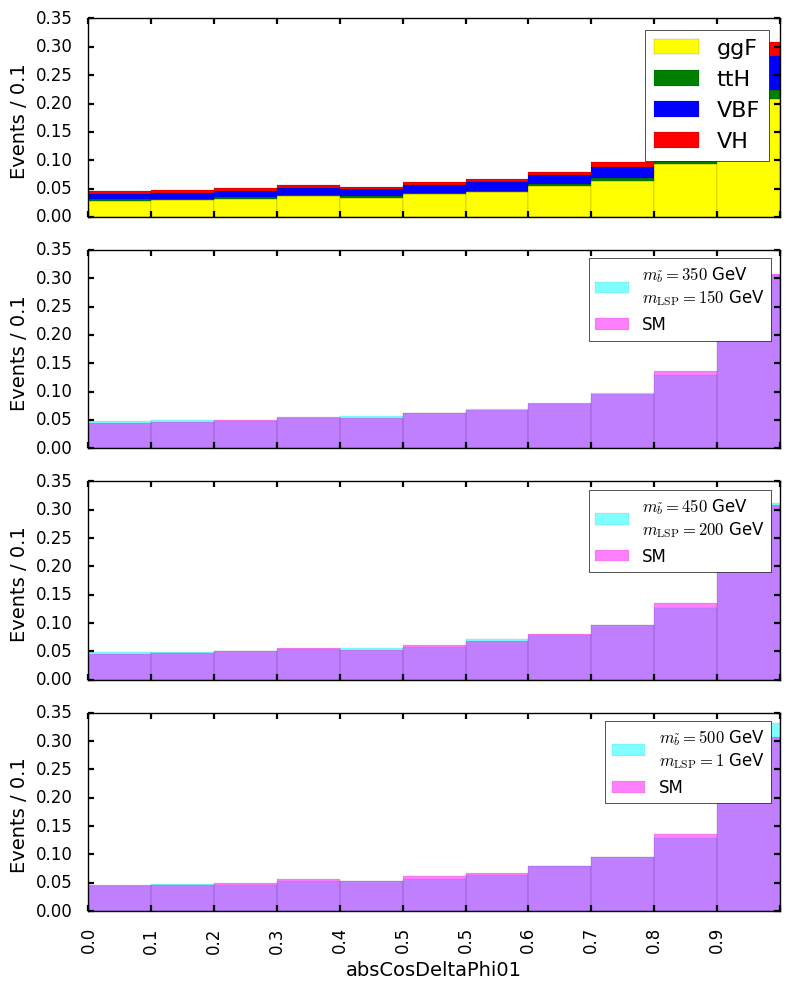

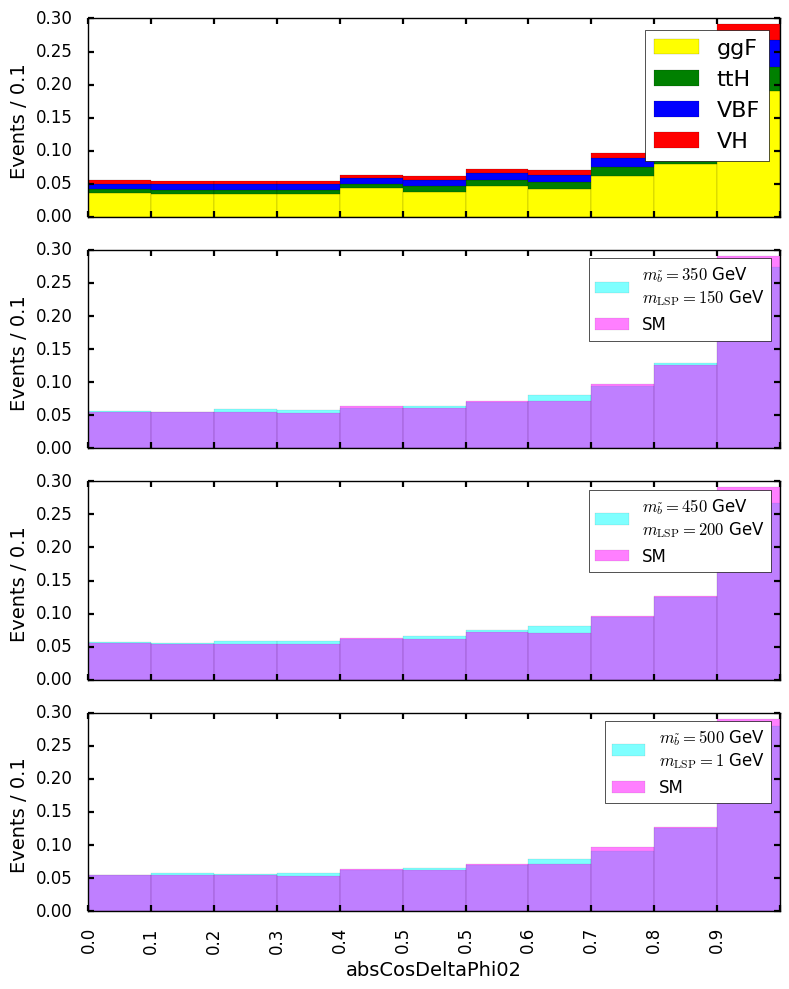

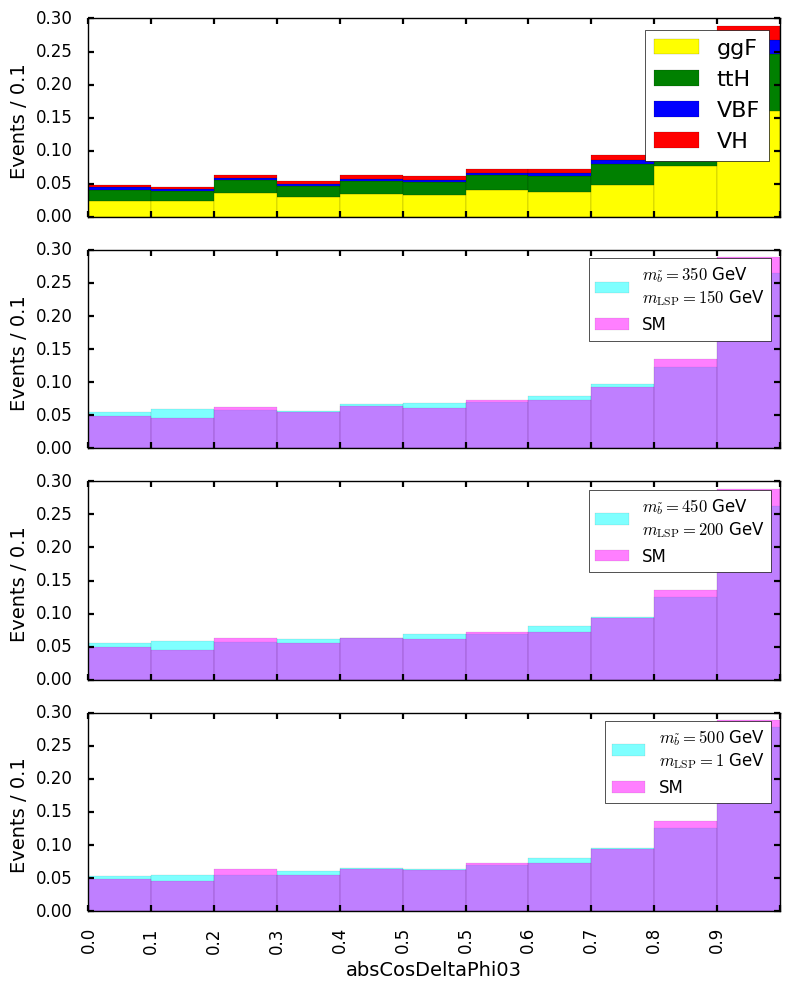

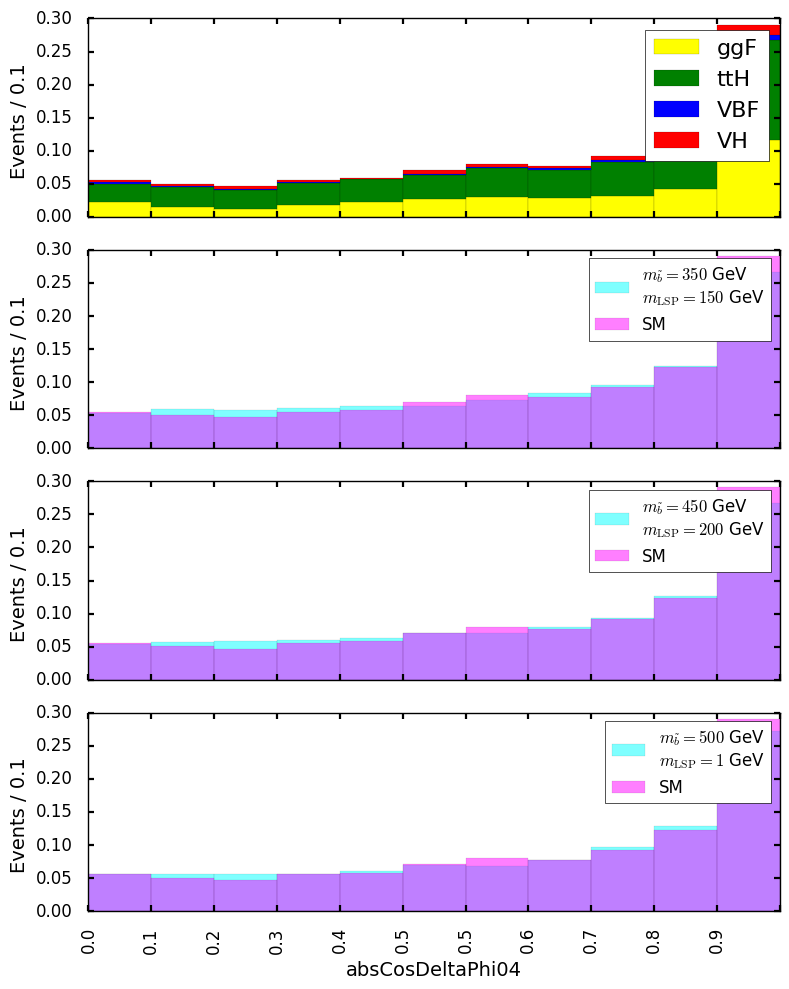

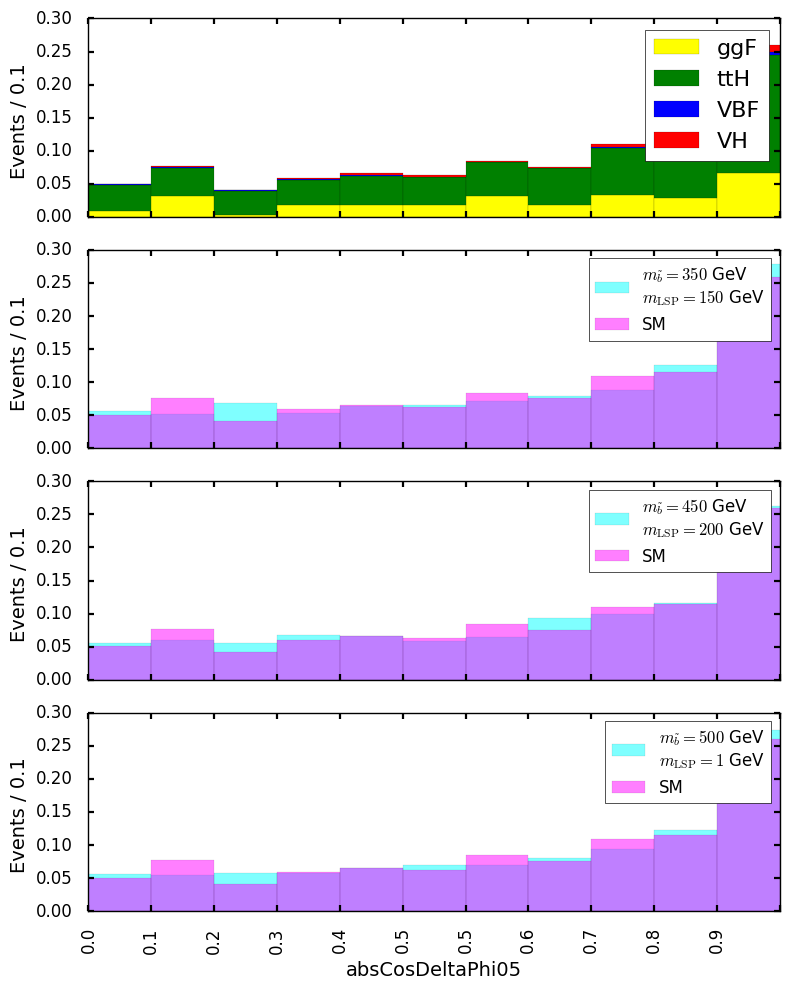

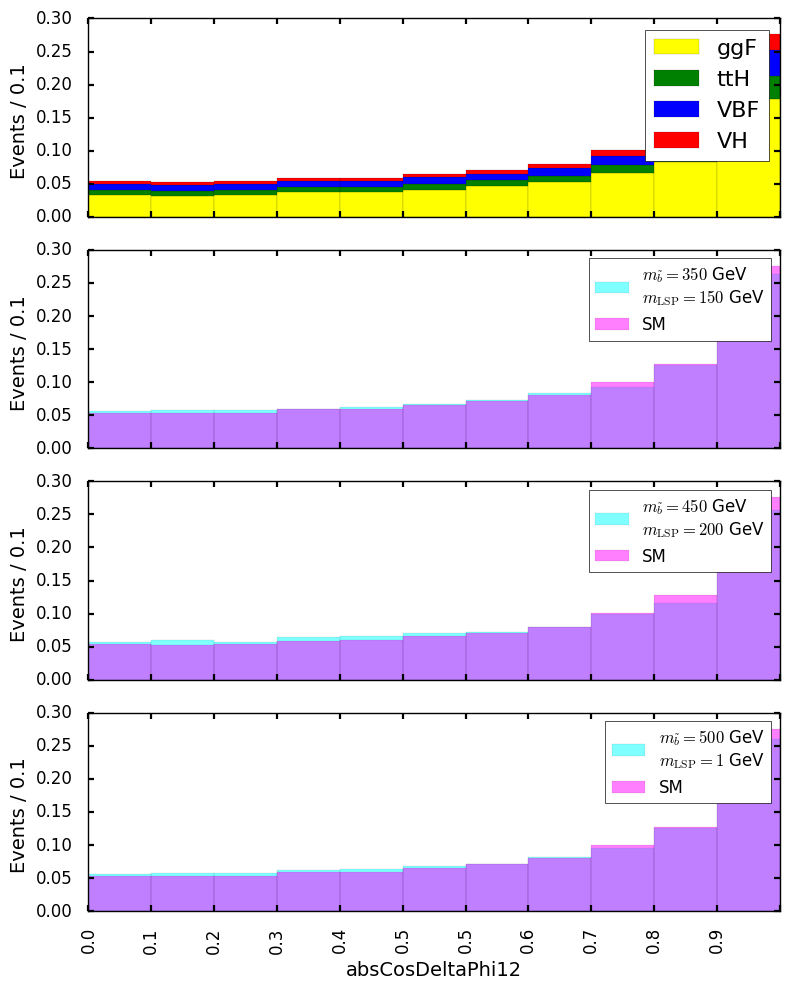

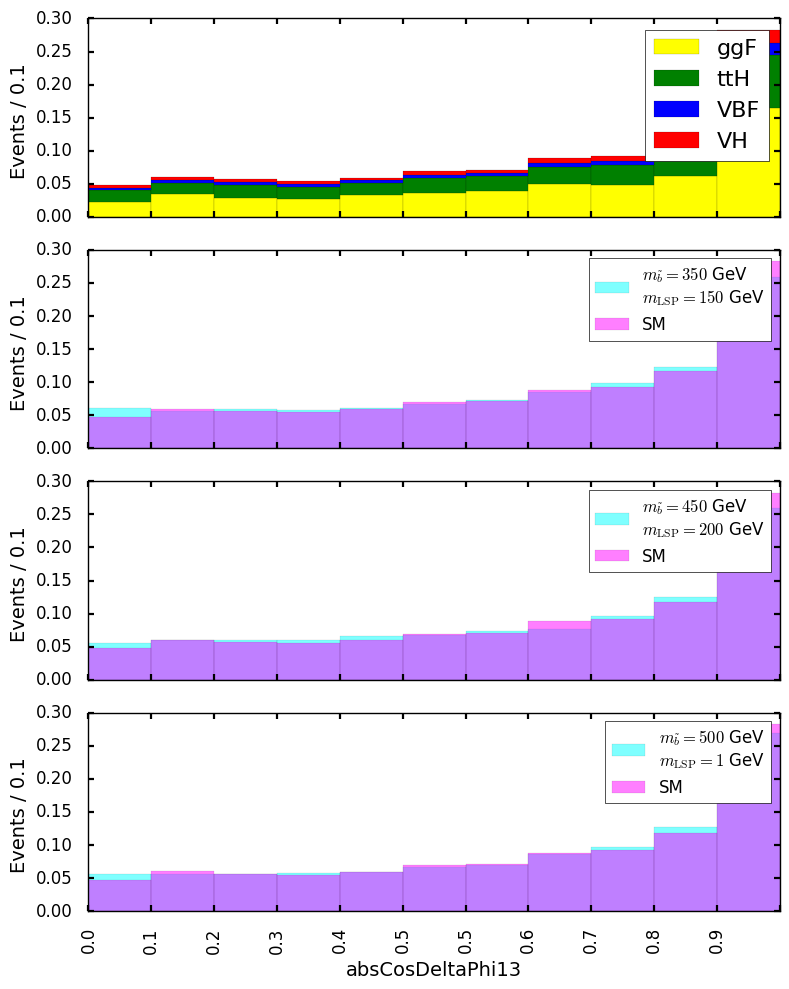

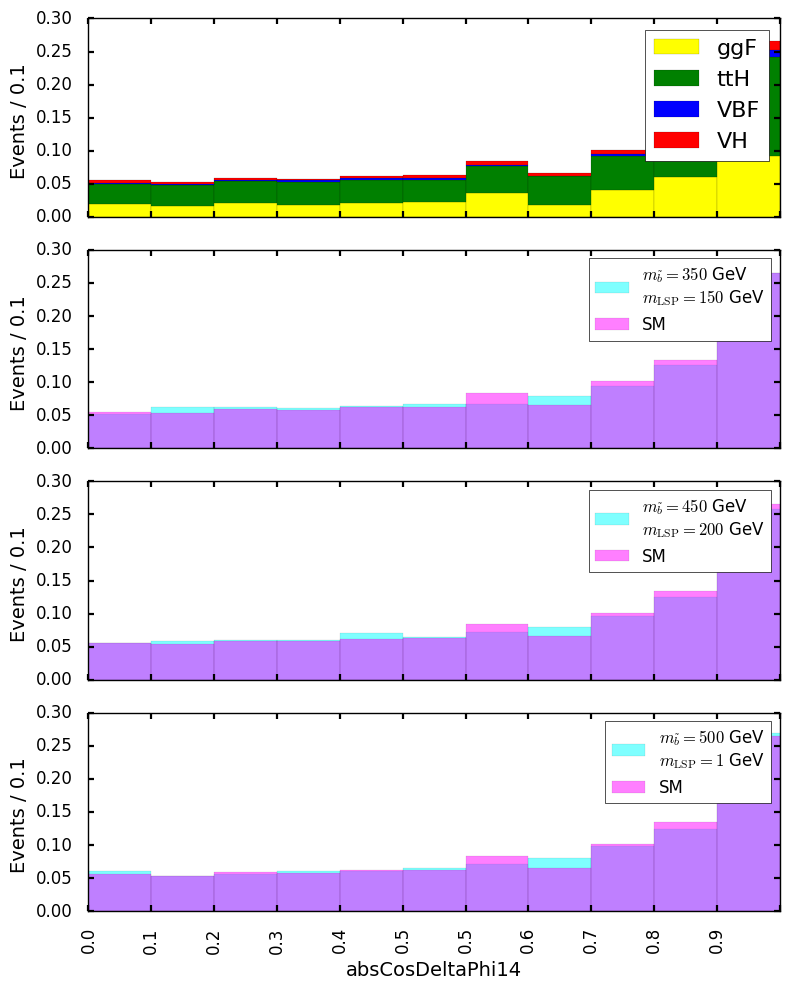

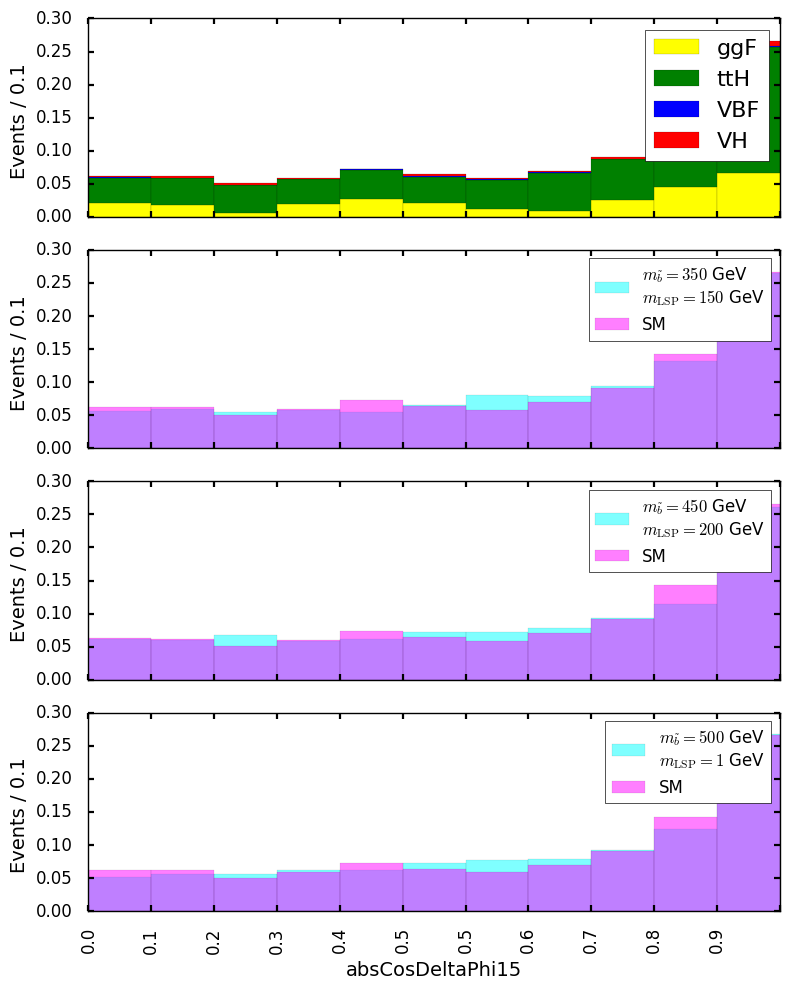

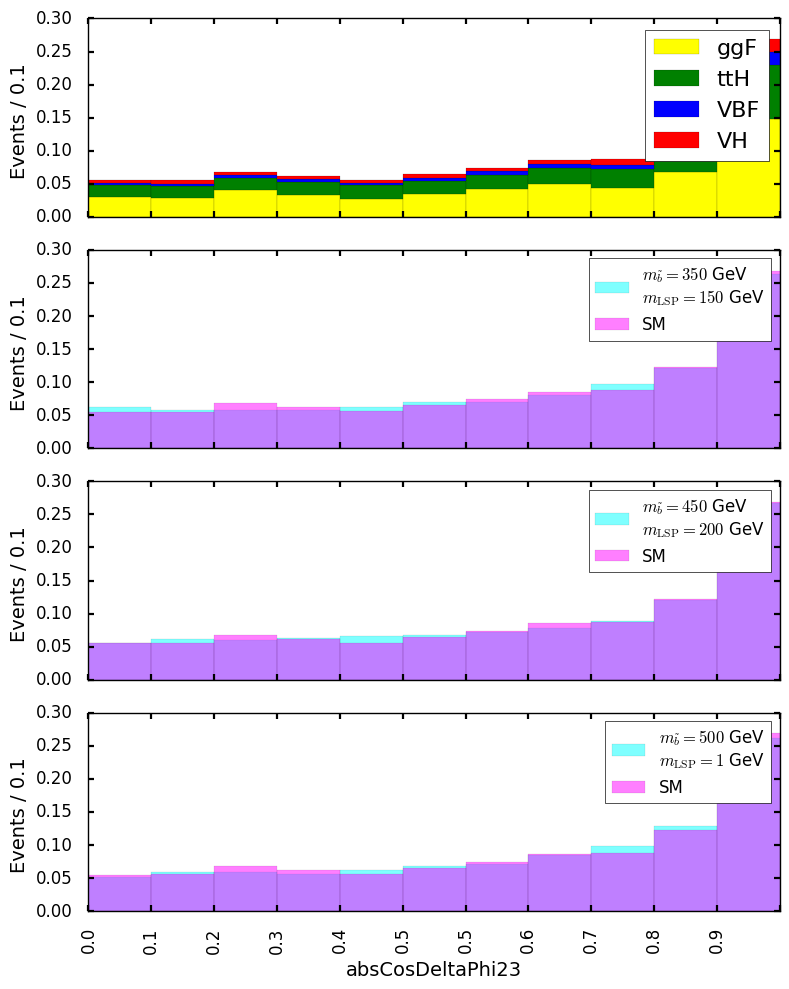

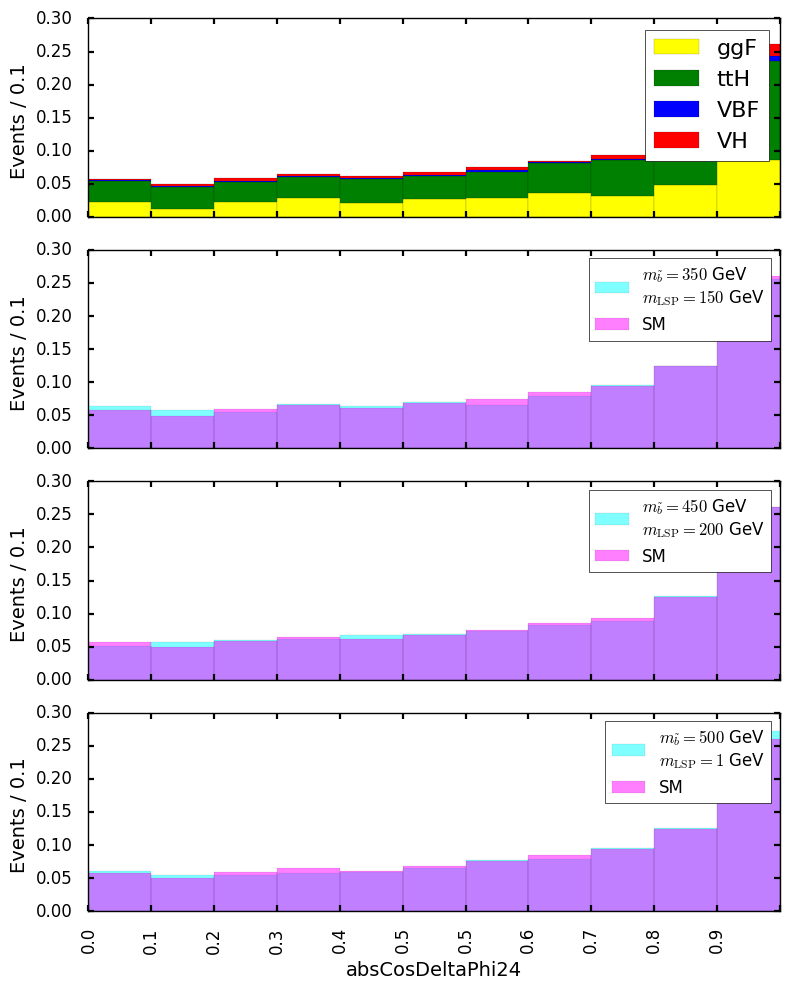

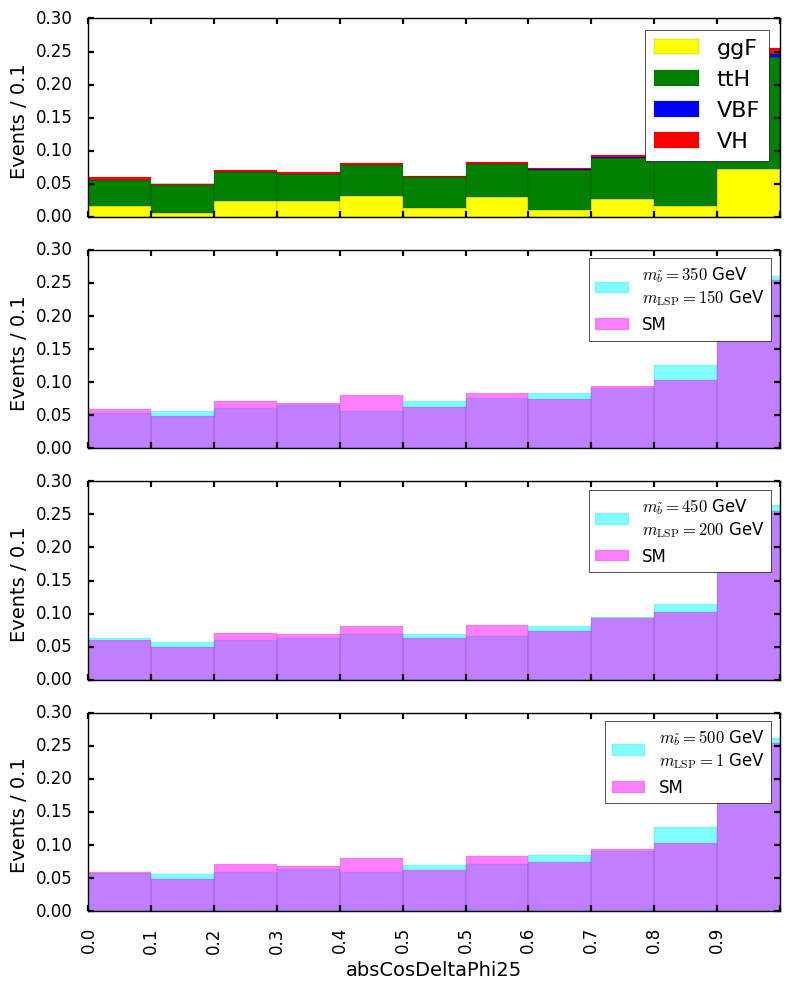

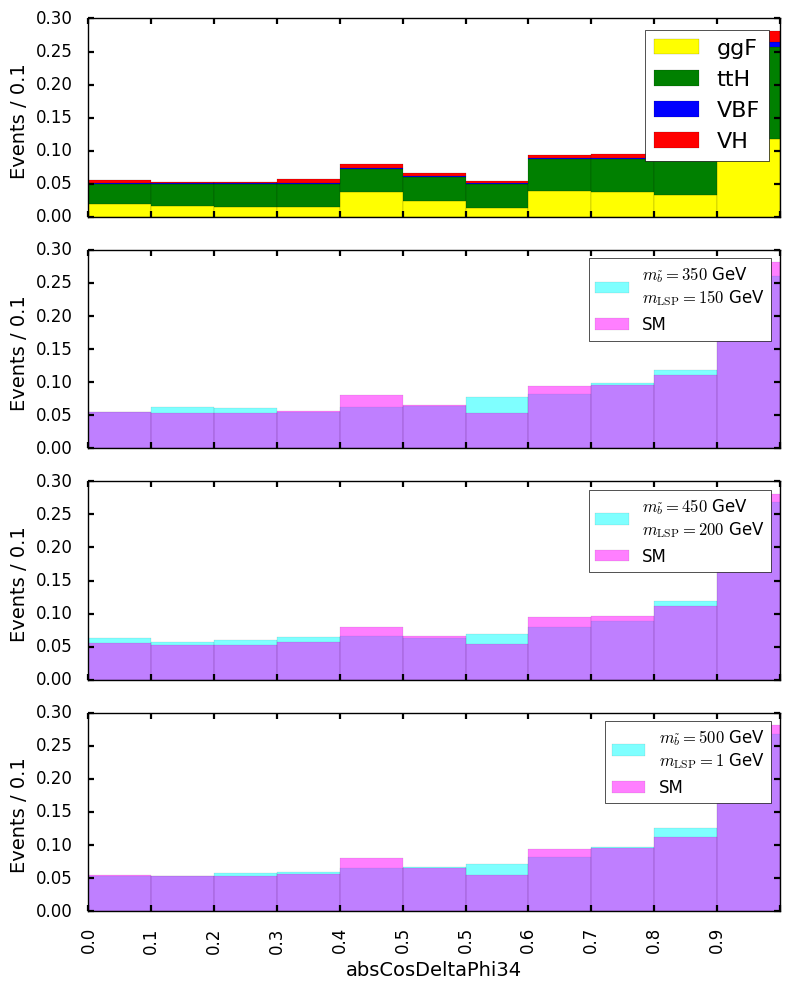

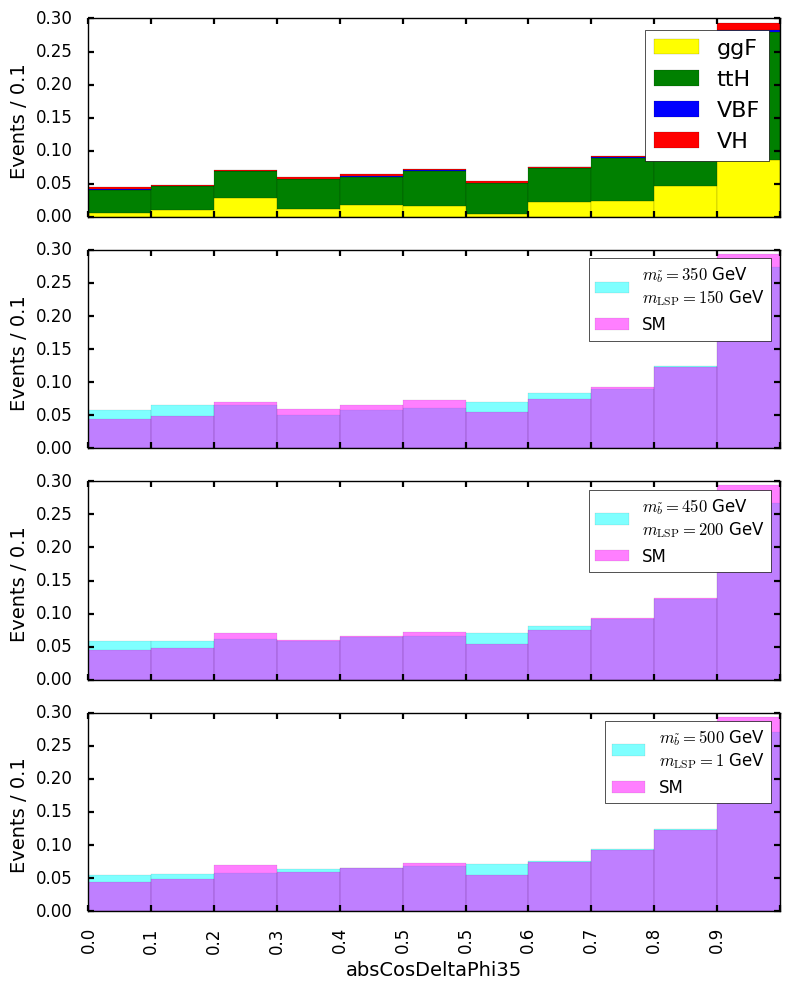

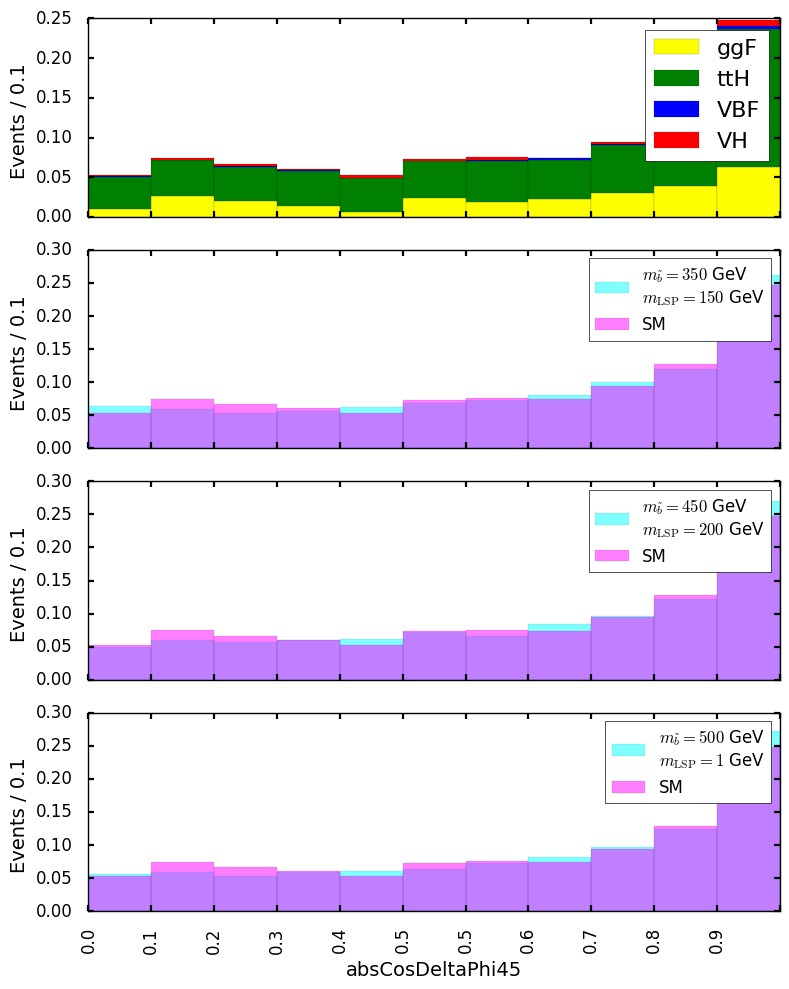

In [29]:
"""
for var in varPt :
    VarDistHistos(SM=df_SM,BSM_list=[df_BSM1,df_BSM2,df_BSM3],variable_binning=binningPt,
             x_label=[var,unitPt],col=var,savepath=None)#path+var)

"""
"""for var in varRapidity :
    VarDistHistos(SM=df_SM,BSM_list=[df_BSM1,df_BSM2,df_BSM3],variable_binning=binningRapidity,
             x_label=[var,unitRapidity],col=var,savepath=path+var)
"""

"""for var in varAbsAlpha :
    VarDistHistos(SM=df_SM,BSM_list=[df_BSM1,df_BSM2,df_BSM3],variable_binning=binningAbsAlpha,
             x_label=[var,unitAbsAlpha],col=var,savepath=path+var)
"""    
for var in varAbsPhi :
    VarDistHistos(SM=df_SM,BSM_list=[df_BSM1,df_BSM2,df_BSM3],variable_binning=binningAbsPhi,
             x_label=[var,unitAbsPhi],col=var,savepath=path+var)
    
"""

for var in varNjets :
    VarDistHistos(SM=df_SM,BSM_list=[df_BSM1,df_BSM2,df_BSM3],variable_binning=binningNjets,
             x_label=[var,unitNjets],col=var,savepath=path+var)

for var in varGenIso :
    VarDistHistos(SM=df_SM,BSM_list=[df_BSM1,df_BSM2,df_BSM3],variable_binning=binningGenIso,
             x_label=[var,unitGenIso],col=var,savepath=path+var)
"""

# Investigate weights 

408952


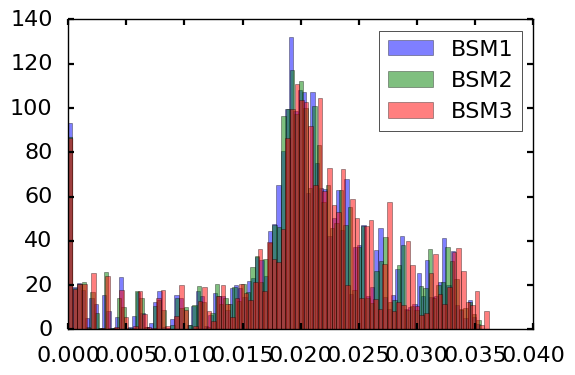

In [33]:
binning = np.linspace(0.,1.8,100)
binning = 100#np.linspace(-1.8,1.8,100)

print len(df_SM[df_SM['weight']<0]['weight'])

plt.hist(df_BSM1['weight'],label="BSM1",bins=binning,alpha=0.5,normed=True)
plt.hist(df_BSM2['weight'],label="BSM2",bins=binning,alpha=0.5,normed=True)
plt.hist(df_BSM3['weight'],label="BSM3",bins=binning,alpha=0.5,normed=True)

#plt.hist(df_SM[df_SM['proc']==0]['puweight'],label="ggF",bins=binning,alpha=0.5,normed=True)

plt.legend(loc='best')
plt.show()


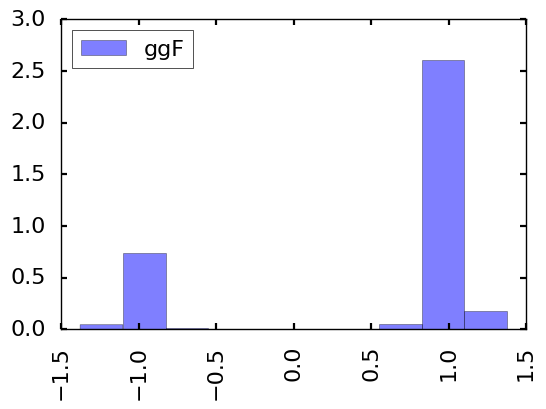

In [48]:
ggF_weight = df_SM[df_SM['proc']==0]['weight']
ggF_puweight = df_SM[df_SM['proc']==0]['puweight']


plt.hist(ggF_weight / ggF_puweight /0.00025 ,label="ggF",bins=10,alpha=0.5,normed=True)

plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()
